In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [9]:
def create_random_digraph(n, p, weights_range=(0, 1)):
    G = nx.DiGraph()
    for i in range(n):
        G.add_edge(i, i, weight=1)
        for j in range(n):
            if i != j and np.random.rand() < p:
                G.add_edge(i, j, weight=np.random.uniform(*weights_range))
    return G

In [56]:
G = create_random_digraph(30, 0.1)

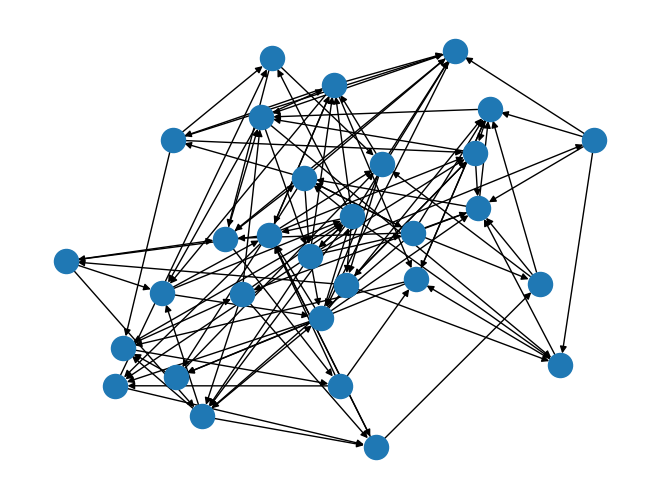

In [57]:
nx.draw(G, with_labels=False)

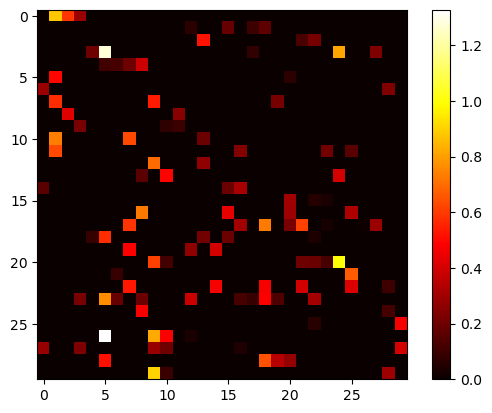

In [72]:
C = nx.adjacency_matrix(G).todense()
C = C / C.sum(axis=1)
plt.imshow(C, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

In [59]:
def eigentrust(C, r_init=None, alpha=0.7, epsilon=1e-6, return_trace=False):
    n = C.shape[0]
    if r_init is None:
        r_init = np.ones((n, 1)) / n
    else:
        r_init = r_init / r_init.sum()
    
    r = r_init
    trace = [(r_init, 0.0)]
    while True:
        r_new = alpha * C.T @ r + (1 - alpha) * r_init
        norm = np.linalg.norm(r_new - r)
        if norm < epsilon:
            break
        r = r_new
        trace.append((r_new, norm))

    if return_trace:
        return r_new, trace
    return r_new

In [60]:
t, trace = eigentrust(C, return_trace=True)

In [61]:
len(trace)

14

Text(0, 0.5, 'Norm of difference between r and r_new')

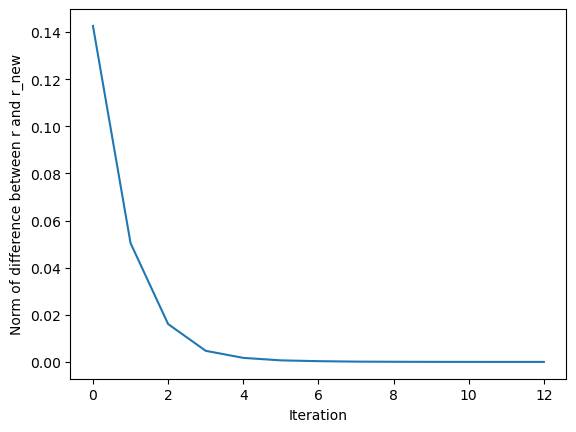

In [62]:
plt.plot(np.arange(len(trace)-1), [t[1] for t in trace[1:]])
plt.xlabel('Iteration')
plt.ylabel('Norm of difference between r and r_new')

<BarContainer object of 30 artists>

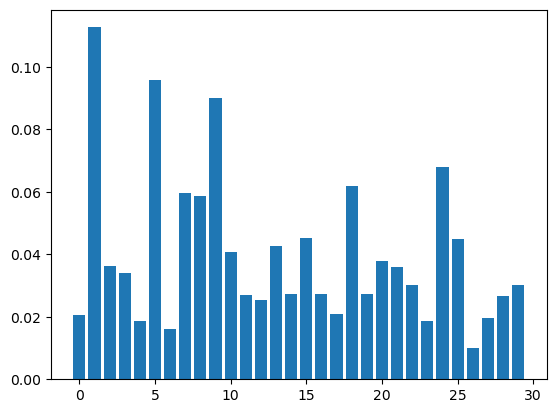

In [63]:
plt.bar(np.arange(len(t)), t.squeeze())

In [54]:
for u, p in enumerate(t.squeeze()):
    print(u, p)

0 0.006739790640361589
1 0.007466194167375191
2 0.012812553858857928
3 0.01635758380152184
4 0.009099951915091232
5 0.013243480337970693
6 0.01732917556541614
7 0.013292754227581268
8 0.014875993455598145
9 0.0054395969818844606
10 0.010460371795908651
11 0.011612008251445328
12 0.006841015509008808
13 0.003973386613880908
14 0.006706755753521329
15 0.01137353208570724
16 0.008199232856412523
17 0.0031598948590386487
18 0.011697398386894818
19 0.010373488136493358
20 0.02235587492344344
21 0.009044047898426418
22 0.010116263069144944
23 0.01662485540434263
24 0.006810180108446342
25 0.00822560174745485
26 0.012640278059254424
27 0.006330371284837278
28 0.015498330261874563
29 0.01379607237385458
30 0.029844021831721305
31 0.015810263670733096
32 0.010833293877116339
33 0.015856935749128748
34 0.007835606606065542
35 0.00959607898189969
36 0.04224623895027495
37 0.03017077734674575
38 0.009640675278557505
39 0.009907883998687434
40 0.009666162361931624
41 0.007905908817184134
42 0.01236

In [55]:
nx.draw?

Signature: nx.draw(G, pos=None, ax=None, **kwds)
Docstring:
Draw the graph G with Matplotlib.

Draw the graph as a simple representation with no node
labels or edge labels and using the full Matplotlib figure area
and no axis labels by default.  See draw_networkx() for more
full-featured drawing that allows title, axis labels etc.

Parameters
----------
G : graph
    A networkx graph

pos : dictionary, optional
    A dictionary with nodes as keys and positions as values.
    If not specified a spring layout positioning will be computed.
    See :py:mod:`networkx.drawing.layout` for functions that
    compute node positions.

ax : Matplotlib Axes object, optional
    Draw the graph in specified Matplotlib axes.

kwds : optional keywords
    See networkx.draw_networkx() for a description of optional keywords.

Examples
--------
>>> G = nx.dodecahedral_graph()
>>> nx.draw(G)
>>> nx.draw(G, pos=nx.spring_layout(G))  # use spring layout

See Also
--------
draw_networkx
draw_networkx_nodes
d

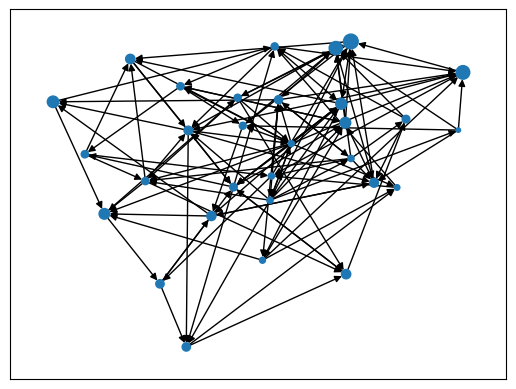

In [71]:
nx.draw_networkx(G, with_labels=False, node_size=t.squeeze()*1000)